In [51]:
import numpy as np
from numba import jit
import csv
import json
import sys
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from choose_strategy_functions import *
from RL_on_network_1 import *

In [52]:
graphs = ["gerrymandered_graph.json", "two_cummunities_graph.json", "scale_free_graph.json"]
initial_beliefs = [[0.99,0.01,0.99,0.01], [0.9,0.9,0.9,0.9]]
strategies = ["expected_payoff", "mixed"]
seed = 12345
results = []
# number of agents = 24, number of tag 0s = 12

Graph: gerrymandered_graph.json Initial beliefs: [0.99, 0.01, 0.99, 0.01] Strategy: expected_payoff


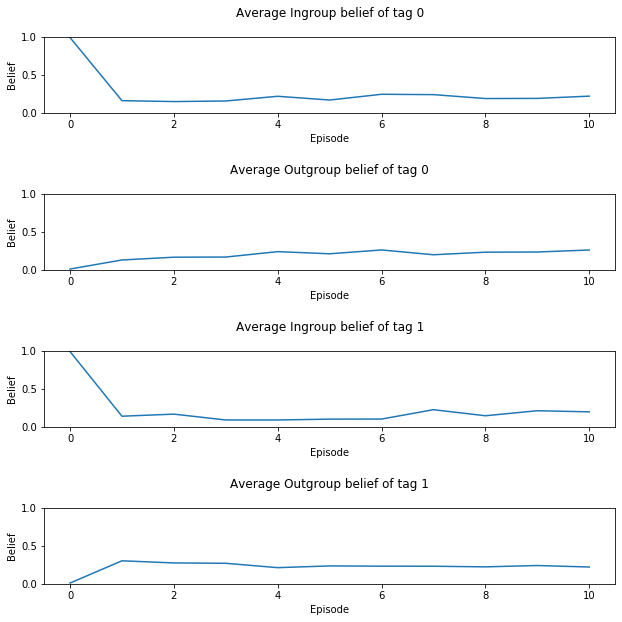

Graph: gerrymandered_graph.json Initial beliefs: [0.99, 0.01, 0.99, 0.01] Strategy: mixed


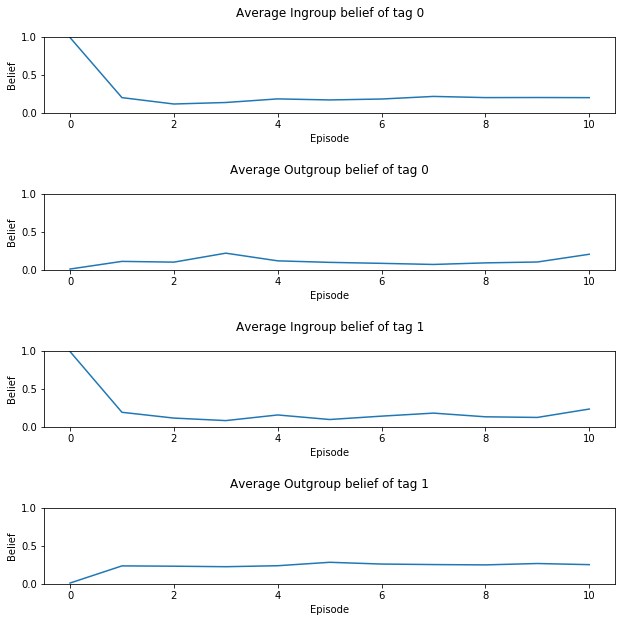

Graph: gerrymandered_graph.json Initial beliefs: [0.9, 0.9, 0.9, 0.9] Strategy: expected_payoff


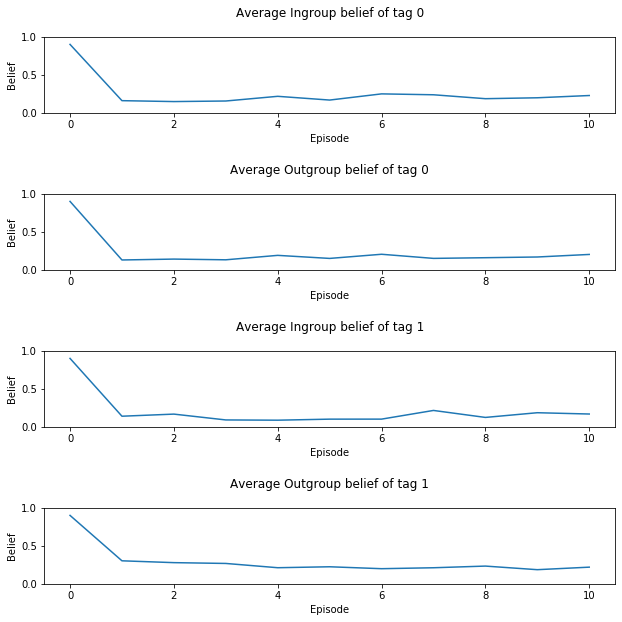

Graph: gerrymandered_graph.json Initial beliefs: [0.9, 0.9, 0.9, 0.9] Strategy: mixed


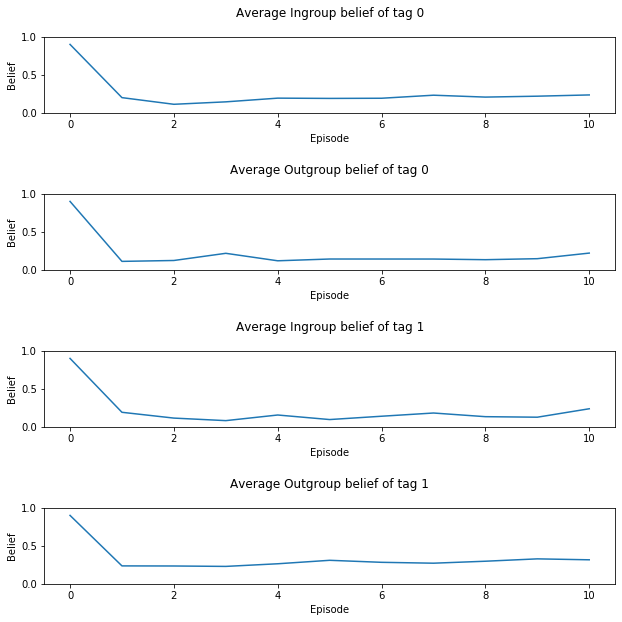

Graph: two_cummunities_graph.json Initial beliefs: [0.99, 0.01, 0.99, 0.01] Strategy: expected_payoff


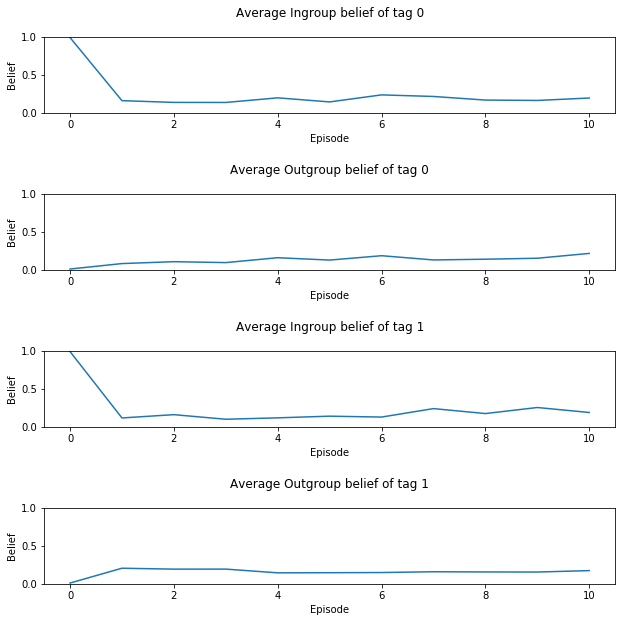

Graph: two_cummunities_graph.json Initial beliefs: [0.99, 0.01, 0.99, 0.01] Strategy: mixed


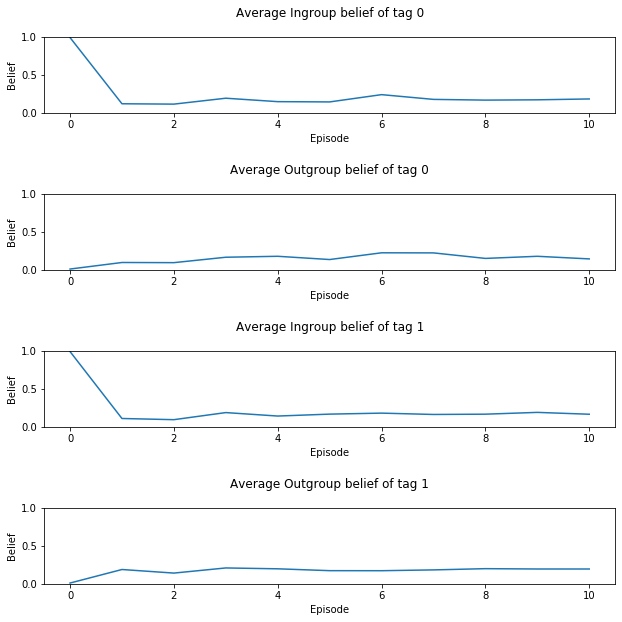

Graph: two_cummunities_graph.json Initial beliefs: [0.9, 0.9, 0.9, 0.9] Strategy: expected_payoff


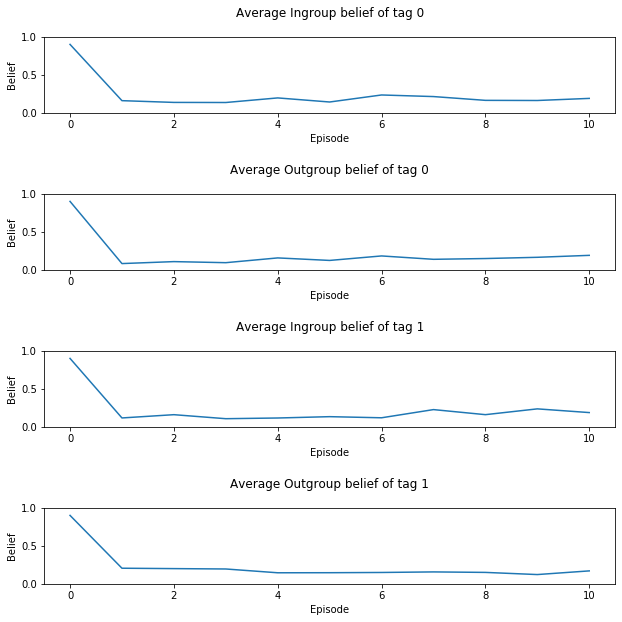

Graph: two_cummunities_graph.json Initial beliefs: [0.9, 0.9, 0.9, 0.9] Strategy: mixed


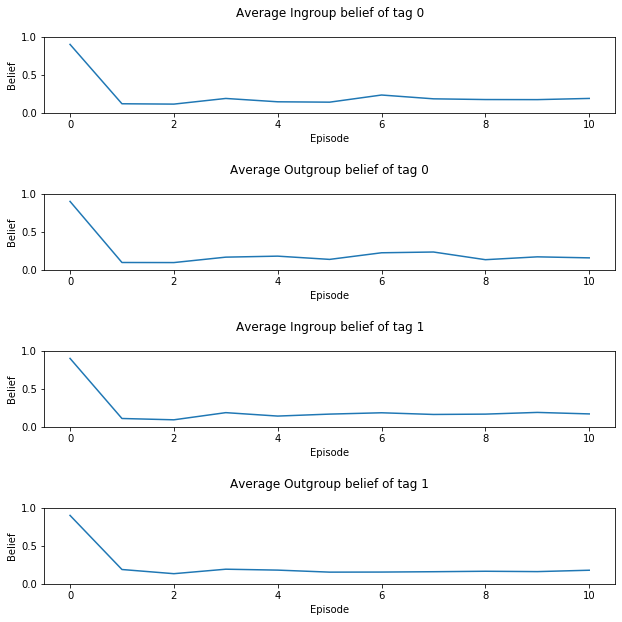

Graph: scale_free_graph.json Initial beliefs: [0.99, 0.01, 0.99, 0.01] Strategy: expected_payoff


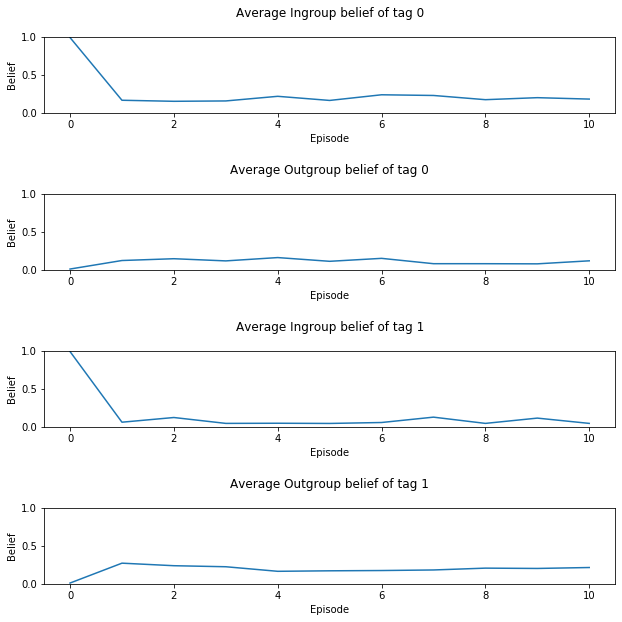

Graph: scale_free_graph.json Initial beliefs: [0.99, 0.01, 0.99, 0.01] Strategy: mixed


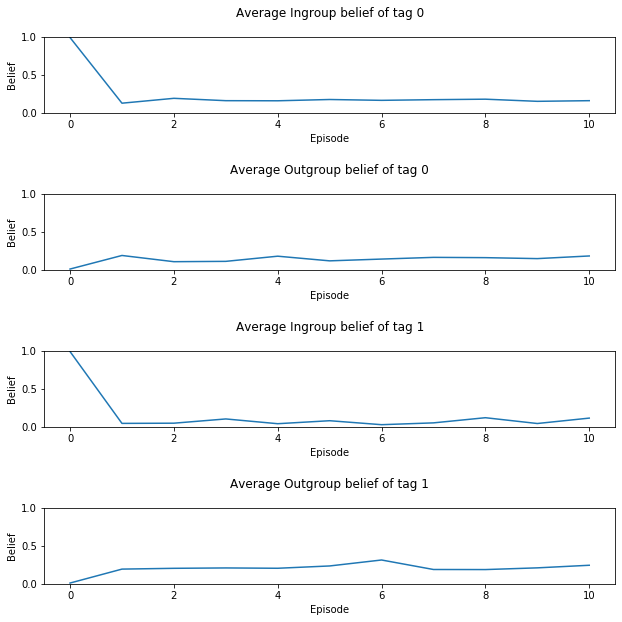

Graph: scale_free_graph.json Initial beliefs: [0.9, 0.9, 0.9, 0.9] Strategy: expected_payoff


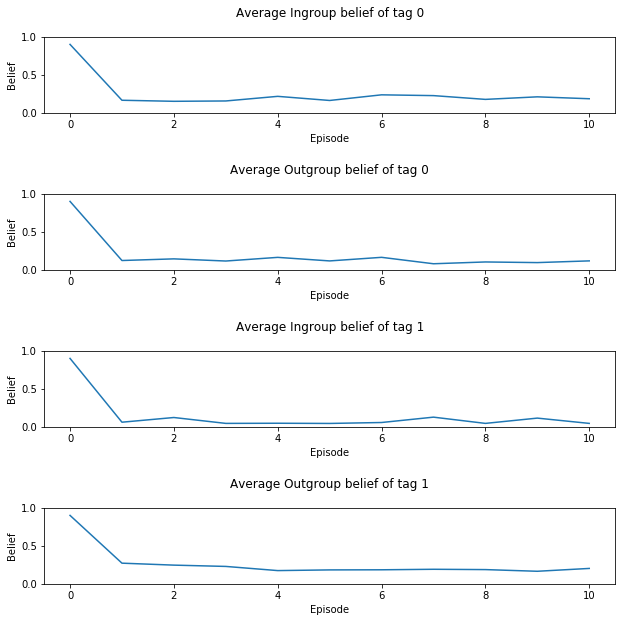

Graph: scale_free_graph.json Initial beliefs: [0.9, 0.9, 0.9, 0.9] Strategy: mixed


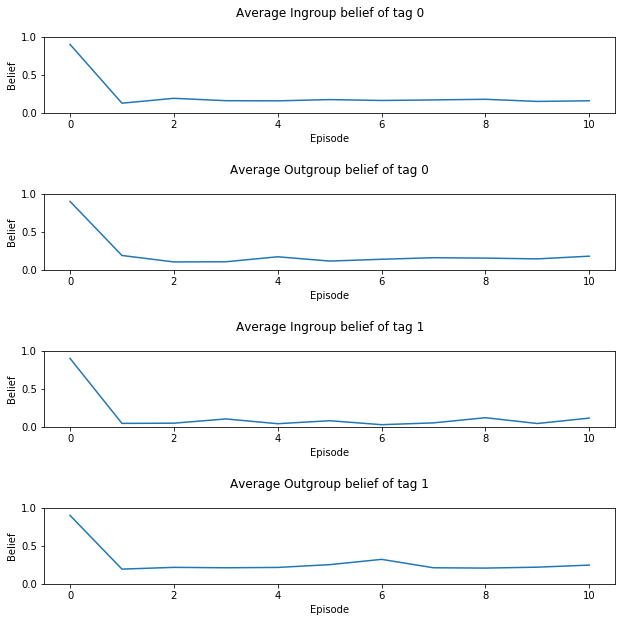

In [53]:
for graph_name in graphs:
    for beliefs in initial_beliefs: 
        for strategy in strategies:
            with open(graph_name) as graph_file:
                graph = nx.readwrite.json_graph.node_link_graph(json.load(graph_file))
            model = Model(24,
                          4, 1,
                          3, 2,
                          beliefs[0],
                          beliefs[1],
                          beliefs[2],
                          beliefs[3],
                          12,
                          graph,
                          choose_strategy_map[strategy])
            ingroup_0, outgroup_0, ingroup_1, outgroup_1 = model.run_simulation(seed, 10, 100, False, "data.csv", 10)
            results.append([ingroup_0, outgroup_0, ingroup_1, outgroup_1])
            print("Graph: " + str(graph_name) + " Initial beliefs: " + str(beliefs) + " Strategy: " + str(strategy))
            plot_results(ingroup_0, outgroup_0, ingroup_1, outgroup_1)